In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
# 2017 Enrollment Ratio 'Capacity', can be over 100%, implying better coverage
EnrollRatioCapacity = pd.read_excel('PopEnrollRatio.xls', header=4)
EnrollRatioCapacity = EnrollRatioCapacity.drop(axis=0, index=0)
enroll_capacity = EnrollRatioCapacity.loc[:, [1, 11, 17, 23]]
enroll_capacity = enroll_capacity.drop(axis=0, index=list(range(96, 109)))
enroll_capacity = enroll_capacity.rename(columns={11: "elem enroll ratio", 17: "sec enroll ratio", 23: "postsec enroll ratio"})
enroll_capacity[1] = enroll_capacity[1].str.replace(r'[^a-zA-Z]', '', regex=True)

enroll_capacity

,1,elem enroll ratio,sec enroll ratio,postsec enroll ratio
1,Africa,NaN,NaN,NaN
2,Algeria,111.76448,---,47.64683
3,Angola,---,---,---
4,Benin,126.64611,---,12.27414
5,BurkinaFaso,93.65313,38.11725,6.0034
...,...,...,...,...
91,Mexico,105.77001,104.38503,40.22896
92,Peru,103.51957,104.69385,70.73786
93,Venezuela,97.15034,88.07702,---
94,Oceania,NaN,NaN,NaN


In [3]:
EnrollRatio_ByAge = pd.read_excel('ElementaryEnrollRatio.xls', header=3)

# Percent of age groups enrolled, prob just using prek for data here
enroll_clean = EnrollRatio_ByAge.drop(axis=1, columns = [2, "Unnamed: 2", 3, "Unnamed: 4", "Unnamed: 10"])
enroll_clean = enroll_clean.drop(axis=0, index=0)

enroll_prek = enroll_clean.loc[:, [1, 7]]
#enroll_child = enroll_clean.loc[:, [1] + list(range(12, 24))]

enroll_prek = enroll_prek.drop(axis=0, index=list(range(42, 51)))
enroll_prek = enroll_prek.drop(axis=0, index=[39, 40])
enroll_prek[1] = enroll_prek[1].str.replace(r'[^a-zA-Z]', '', regex=True)
enroll_prek = enroll_prek.rename(columns={7: "prek enroll"})

enroll_prek

,1,prek enroll
1,Australia,79.236
2,Austria,83.724
3,Belgium,98.192
4,Canada,---
5,Chile,70.474
6,Colombia,---
7,CostaRica,33.78
8,CzechRepublic,81.458
9,Denmark,97.484
10,Estonia,88.712


In [4]:
stu_tea_rat = pd.read_excel('PupilTeacherRatio.xls', header=3)
stu_tea_rat = stu_tea_rat.drop(axis=0, index=0)

#Student-teacher ratios
prim_teacher = stu_tea_rat.loc[:, [1]+list(range(2, 7))]
loSec_teacher = stu_tea_rat.loc[:, [1]+list(range(7, 12))]
hiSec_teacher = stu_tea_rat.loc[:, [1]+list(range(12, 17))]

teacher_ratio = stu_tea_rat.loc[:, [1, 2, 7, 12]]
teacher_ratio = teacher_ratio.drop(axis=0, index=list(range(42, 54)))
teacher_ratio = teacher_ratio.rename(columns={2: "elem teacher ratio", 7: "low sec teacher ratio", 12: "hi sec teacher ratio"})

teacher_ratio[1] = teacher_ratio[1].str.replace(r'[^a-zA-Z]', '', regex=True)


teacher_ratio

,1,elem teacher ratio,low sec teacher ratio,hi sec teacher ratio
1,Australia,15.433,---,12.254
2,Austria,11.843,8.73,10.149
3,Belgium,12.784,9.073,9.924
4,Canada,16.978,---,12.966
5,Chile,20.891,21.878,22.975
6,Colombia,24.239,26.695,25.938
7,CostaRica,12.676,14.007,13.858
8,CzechRepublic,18.974,11.841,11.135
9,Denmark,---,---,---
10,Estonia,13.347,9.544,15.229


In [5]:
class_size = pd.read_excel('ClassSize.xls', header=4)
class_size = class_size.drop(axis=0, index=[0]+list(range(41, 61)))

class_size = class_size.loc[:, [1, 14, 15]]
class_size[1] = class_size[1].str.replace(r'[^a-zA-Z]', '', regex=True)
class_size = class_size.rename(columns={14: "elem class size", 15: "low sec class size"})

class_size

,1,elem class size,low sec class size
1,Australia,23.389,21.422
2,Austria,18.412,21.15
3,BelgiumFlemish,---,---
4,BelgiumFrench,---,---
5,Canada,---,---
6,Chile,28.097,28.607
7,Colombia,25.049,31.417
8,CzechRepublic,21.283,21.862
9,Denmark,21.614,21.655
10,Estonia,19.187,18.67


In [6]:
selfrep_bully = pd.read_excel('SelfReportedBully2015.xls', header=4)
selfrep_bully = selfrep_bully.drop(axis=0, index=0)

# Student self reported experience with bullying by frequency and grade
selfrep_bully = selfrep_bully.loc[:, [1]+list(range(2, 8))]
selfrep_bully = selfrep_bully.drop(axis=0, index=list(range(65, 89)))

selfrep_bully[1] = selfrep_bully[1].str.replace(r'[^a-zA-Z]', '', regex=True)
selfrep_bully = selfrep_bully.rename(columns={2: "4th never bullied", 
                  3: "8th never bullied", 4: "4th sometimes bullied", 5: "8th sometimes bullied",
                 6: "4th repeatedly bullied", 7:"8th repeatedly bullied"})


selfrep_bully

,1,4th never bullied,8th never bullied,4th sometimes bullied,8th sometimes bullied,4th repeatedly bullied,8th repeatedly bullied
1,Australia,45,57,36,34,20,9
2,Bahrain,34,49,33,36,33,15
3,BelgiumFlemish,47,---,36,---,17,---
4,Bulgaria,54,---,30,---,16,---
5,Canada,53,65,30,30,17,5
...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Thailand,---,33,---,50,---,17
62,Turkey,57,69,28,26,14,6
63,UnitedArabEmirates,43,58,31,32,26,10


In [7]:
# Teacher rated discpline safety issue severity
school_safety = pd.read_excel('TeacherSafety2015.xls', header=4)
school_safety = school_safety.drop(axis=0, index=0)

school_safety = school_safety.loc[:, [1]+list(range(2, 8))]
school_safety = school_safety.drop(axis=0, index=list(range(65, 173)))
school_safety[1] = school_safety[1].str.replace(r'[^a-zA-Z]', '', regex=True)

school_safety = school_safety.rename(columns={2: "4th safe", 
                  3: "8th safe", 4: "4th mostly safe", 5: "8th mostly safe",
                 6: "4th not safe", 7:"8th not safe"})

school_safety

,1,4th safe,8th safe,4th mostly safe,8th mostly safe,4th not safe,8th not safe
1,Australia,75,60,23,33,2,7
2,Bahrain,56,50,37,44,8,6
3,BelgiumFlemish,43,---,52,---,5,---
4,Bulgaria,69,---,29,---,2,---
5,Canada,55,50,42,45,3,4
...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Thailand,---,44,---,51,---,6
62,Turkey,49,30,44,47,7,23
63,UnitedArabEmirates,62,67,35,32,3,2


In [8]:
# Teacher rated discpline problems severity
school_discipline = pd.read_excel('TeacherDiscipline2015.xls', header=4)
school_discipline = school_discipline.drop(axis=0, index=0)

school_discipline = school_discipline.loc[:, [1]+list(range(2, 8))]
school_discipline = school_discipline.drop(axis=0, index=list(range(65, 174)))
school_discipline[1] = school_discipline[1].str.replace(r'[^a-zA-Z]', '', regex=True)
school_discipline = school_discipline.rename(columns={2: "4th no problems", 
                  3: "8th no problems", 4: "4th minor problems", 5: "8th minor problems",
                 6: "4th severe problems", 7:"8th severe problems"})

school_discipline

,1,4th no problems,8th no problems,4th minor problems,8th minor problems,4th severe problems,8th severe problems
1,Australia,64,48,30,51,‡,‡
2,Bahrain,59,51,26,36,14,13
3,BelgiumFlemish,68,---,31,---,1,---
4,Bulgaria,72,---,20,---,8,---
5,Canada,66,45,31,54,2,‡
...,...,...,...,...,...,...,...
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Thailand,---,42,---,53,---,5
62,Turkey,44,19,29,49,26,32
63,UnitedArabEmirates,61,54,31,40,8,6


In [9]:
# Teacher rated drug problem severity
school_drugs = pd.read_excel('TeacherDrugs.xls', header=4)
school_drugs = school_drugs.drop(axis=0, index=0)
school_drugs = school_drugs.loc[:, [1, 14, 15, 16]]
school_drugs[1] = school_drugs[1].str.replace(r'[^a-zA-Z]', '', regex=True)
school_drugs = school_drugs.drop(axis=0, index=list(range(42, 51)))
school_drugs = school_drugs.rename(columns={14: "No drugs", 15: "Some drugs", 16: "Many drugs"})

school_drugs

,1,No drugs,Some drugs,Many drugs
1,Australia,34.0,58.0,8
2,Austria,60.0,29.0,11
3,Belgium,22.0,69.0,9
4,Canada,10.0,62.0,28
5,Chile,29.0,49.0,22
6,NaN,NaN,NaN,NaN
7,CzechRepublic,57.0,38.0,5
8,Denmark,70.0,27.0,3
9,Estonia,66.0,31.0,3
10,Finland,48.0,48.0,4


In [10]:
# Teacher reported bullying
school_bully = pd.read_excel('TeacherBullying.xls', header=4)
school_bully = school_bully.drop(axis=0, index=0)
school_bully = school_bully.drop(axis=0, index=list(range(42, 51)))

school_bully = school_bully.loc[:, [1, 14, 15, 16]]
school_bully[1] = school_bully[1].str.replace(r'[^a-zA-Z]', '', regex=True)

school_bully = school_bully.rename(columns={14: "Teacher no bully", 15: "Teacher some bully", 16: "Teacher many bully"})

school_bully

,1,Teacher no bully,Teacher some bully,Teacher many bully
1,Australia,12,70.0,18
2,Austria,18,64.0,18
3,Belgium,14,60.0,26
4,Canada,14,73.0,13
5,Chile,21,65.0,14
6,NaN,NaN,NaN,NaN
7,CzechRepublic,28,65.0,7
8,Denmark,28,66.0,6
9,Estonia,16,67.0,18
10,Finland,5,72.0,23


In [11]:
### Gdp and education expenditure absolute by year
expend_abs = pd.read_excel('GdpVsEduExpend.xls', header=3)
expend_abs = expend_abs.drop(axis=0, index=[0, 1])
expend_abs = expend_abs.drop(axis=0, index=list(range(80, 92)))
expend_abs = expend_abs.loc[:, [1, 4, 10, 16]]
expend_abs[1] = expend_abs[1].str.replace(r'[^a-zA-Z]', '', regex=True)
expend_abs = expend_abs.rename(columns={4: "gdp per capita", 10: "prim/sec per student spending", 16: "postsec per student spending"})

expend_abs

,1,gdp per capita,prim/sec per student spending,postsec per student spending
2,Australia,46802.793000,10745.37,20304.37
3,Austria,49942.066000,13935.04,17560.62
4,Belgium,46200.887000,11892.67,17469.7
5,Canada,44745.078000,10567.61,21810.46
6,Chile,22603.768000,4261.283,6731.183
...,...,...,...,...
75,Sweden,52640.938689,12416.300852,26457.282758
76,Switzerland,66459.039289,15251.457035,---
77,Turkey,46594.029827,8243.547174,18757.269701
78,UnitedKingdom,45334.742211,12094.56468,28865.41515


In [12]:
#Gdp to expenditure ratio
expend_ratio = pd.read_excel('GovAndPrivExpend.xls', header=4)
expend_ratio = expend_ratio.drop(axis=0, index=0)
expend_ratio = expend_ratio.loc[:, list(range(1, 26))]
expend_ratio[1] = expend_ratio[1].str.replace('[^a-zA-Z\s]', '', regex=True)

In [13]:
read_lit = pd.read_excel('ReadingLiteracy2018.xls', header=5)
read_lit = read_lit.drop(axis=0, index=0)
read_lit = read_lit.loc[:, [1, 2]]
read_lit = read_lit.drop(axis=0, index=list(range(80, 97)))
read_lit[1] = read_lit[1].str.replace('[^a-zA-Z\s]', '', regex=True)
read_lit = read_lit.rename(columns={2: "reading literacy"})

read_lit

,1,reading literacy
1,Australia,502.631724
2,Austria,484.392569
3,Belgium,492.864439
4,Canada,520.085521
5,Chile,452.272554
...,...,...
75,Singapore,549.464708
76,Thailand,392.888641
77,Ukraine,465.950148
78,United Arab Emirates,431.781769


In [14]:
math_lit = pd.read_excel('MathLiteracy2018.xls', header=5)
math_lit = math_lit.drop(axis=0, index=0)
math_lit = math_lit.drop(axis=0, index=list(range(80, 97)))
math_lit = math_lit.loc[:, [1, 2]]
math_lit[1] = math_lit[1].str.replace(r'[^a-zA-Z]', '', regex=True)
math_lit = math_lit.rename(columns={2: "math literacy"})

math_lit

,1,math literacy
1,Australia,491.360025
2,Austria,498.942314
3,Belgium,508.070306
4,Canada,512.016943
5,Chile,417.406556
...,...,...
75,Singapore,569.00778
76,Thailand,418.555502
77,Ukraine,453.117499
78,UnitedArabEmirates,434.947252


In [15]:
sci_lit = pd.read_excel('ScienceLiteracy2018.xls', header=5)
sci_lit = sci_lit.drop(axis=0, index=0)
sci_lit = sci_lit.drop(axis=0, index=list(range(80, 97)))
sci_lit = sci_lit.loc[:, [1, 2]]

sci_lit[1] = sci_lit[1].str.replace(r'[^a-zA-Z]', '', regex=True)
sci_lit = sci_lit.rename(columns={2: "science literacy"})

sci_lit

,1,science literacy
1,Australia,502.964563
2,Austria,489.78044
3,Belgium,498.773127
4,Canada,517.997661
5,Chile,443.582563
...,...,...
75,Singapore,550.9369
76,Thailand,425.81345
77,Ukraine,468.987743
78,UnitedArabEmirates,433.636803


In [16]:
bach_deg = pd.read_excel('BachelorsDeg.xls', header=3)
bach_deg = bach_deg.drop(axis=0, index=0)
bach_deg = bach_deg.drop(axis=0, columns=2)
bach_deg = bach_deg.loc[:, [1]+list(range(3, 10))]

In [146]:
dfs = [enroll_capacity, enroll_prek, teacher_ratio, class_size, selfrep_bully, school_safety, school_discipline, 
       school_drugs, school_bully, expend_abs, read_lit, math_lit, sci_lit]

#dfs = [teacher_ratio, expend_abs, read_lit, math_lit, sci_lit]


#dfs = [school_safety, school_drugs, school_discipline, read_lit, math_lit, sci_lit]


df_list = dfs

""""
for df in df_list:
    df[1] = df[1].str.replace(r'[^a-zA-Z]', '', regex=True)
    df.set_index(1, inplace=True)
"""
    
    
dfs = [expend_abs, read_lit, math_lit, sci_lit]

In [147]:
data = dfs[0]

for df in dfs[1:]:
    data = pd.merge(data, df, left_index=True, right_index=True, how='inner')
    
data = data[data.index.notnull()]
data

,gdp per capita,prim/sec per student spending,postsec per student spending,reading literacy,math literacy,science literacy
1,,,,,,
Australia,46802.793000,10745.37,20304.37,502.631724,491.360025,502.964563
Australia,50464.877538,11586.141476,21893.085431,502.631724,491.360025,502.964563
Austria,49942.066000,13935.04,17560.62,484.392569,498.942314,489.78044
Austria,54003.204981,15068.195648,18988.596937,484.392569,498.942314,489.78044
Belgium,46200.887000,11892.67,17469.7,492.864439,508.070306,498.773127
...,...,...,...,...,...,...
Turkey,46594.029827,8243.547174,18757.269701,465.631666,453.507778,468.299619
UnitedKingdom,41629.699000,11106.12,26506.35,503.928109,501.769899,504.667474
UnitedKingdom,45334.742211,12094.56468,28865.41515,503.928109,501.769899,504.667474


In [148]:
print(data.index.tolist())

['Australia', 'Australia', 'Austria', 'Austria', 'Belgium', 'Belgium', 'Canada', 'Canada', 'Chile', 'Chile', 'Colombia', 'Colombia', 'CostaRica', 'CostaRica', 'CzechRepublic', 'CzechRepublic', 'Denmark', 'Denmark', 'Estonia', 'Estonia', 'Finland', 'Finland', 'France', 'France', 'Germany', 'Germany', 'Greece', 'Greece', 'Hungary', 'Hungary', 'Iceland', 'Iceland', 'Ireland', 'Ireland', 'Israel', 'Israel', 'Italy', 'Italy', 'Japan', 'Japan', 'KoreaRepublicof', 'KoreaRepublicof', 'Latvia', 'Latvia', 'Lithuania', 'Lithuania', 'Luxembourg', 'Luxembourg', 'Mexico', 'Mexico', 'Netherlands', 'Netherlands', 'NewZealand', 'NewZealand', 'Norway', 'Norway', 'Poland', 'Poland', 'Portugal', 'Portugal', 'SlovakRepublic', 'SlovakRepublic', 'Slovenia', 'Slovenia', 'Spain', 'Spain', 'Sweden', 'Sweden', 'Switzerland', 'Switzerland', 'Turkey', 'Turkey', 'UnitedKingdom', 'UnitedKingdom', 'UnitedStates', 'UnitedStates']


In [149]:
# Convert columns to a common data type, like float
df = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reset the index to make the row headers a column
df_reset = df.reset_index()

# Group the DataFrame by the header column and sum the values in each group
df_grouped = df_reset.groupby(1).sum()

# Reset the index again to make the row headers a proper index
df_merged = df_grouped.reset_index().set_index(1)

df_merged.index.name = 'Country'

In [150]:
df_merged

,gdp per capita,prim/sec per student spending,postsec per student spending,reading literacy,math literacy,science literacy
Country,,,,,,
Australia,97267.670538,22331.511476,42197.455431,1005.263449,982.720050,1005.929126
Austria,103945.270981,29003.235648,36549.216937,968.785137,997.884628,979.560879
Belgium,96377.683733,24808.787502,36442.789973,985.728877,1016.140613,997.546254
Canada,93163.905884,22002.863051,45411.646008,1040.171042,1024.033886,1035.995322
Chile,48554.069060,9153.457471,14458.931106,904.545108,834.813112,887.165127
Colombia,29712.825135,6079.388480,10445.275263,824.590171,781.864547,826.645986
CostaRica,36500.669829,0.000000,0.000000,852.996450,804.661117,831.244924
CzechRepublic,71818.101860,15079.889118,23213.201801,980.437630,998.935302,993.582621
Denmark,99800.595155,0.000000,0.000000,1002.259868,1018.796749,985.274067


In [151]:
zero_count = (df_merged == 0).sum(axis=1)

In [152]:
DF_CLEAN = df_merged[zero_count <= 30]

In [153]:
DF_CLEAN

,gdp per capita,prim/sec per student spending,postsec per student spending,reading literacy,math literacy,science literacy
Country,,,,,,
Australia,97267.670538,22331.511476,42197.455431,1005.263449,982.720050,1005.929126
Austria,103945.270981,29003.235648,36549.216937,968.785137,997.884628,979.560879
Belgium,96377.683733,24808.787502,36442.789973,985.728877,1016.140613,997.546254
Canada,93163.905884,22002.863051,45411.646008,1040.171042,1024.033886,1035.995322
Chile,48554.069060,9153.457471,14458.931106,904.545108,834.813112,887.165127
Colombia,29712.825135,6079.388480,10445.275263,824.590171,781.864547,826.645986
CostaRica,36500.669829,0.000000,0.000000,852.996450,804.661117,831.244924
CzechRepublic,71818.101860,15079.889118,23213.201801,980.437630,998.935302,993.582621
Denmark,99800.595155,0.000000,0.000000,1002.259868,1018.796749,985.274067


In [154]:
mean_nonzero = DF_CLEAN.replace(0, np.nan).mean(skipna=True)

# Replace all 0s with the mean value
df_means = DF_CLEAN.replace(0, mean_nonzero)

Text(0.5, 1.0, 'Scatter Plot')

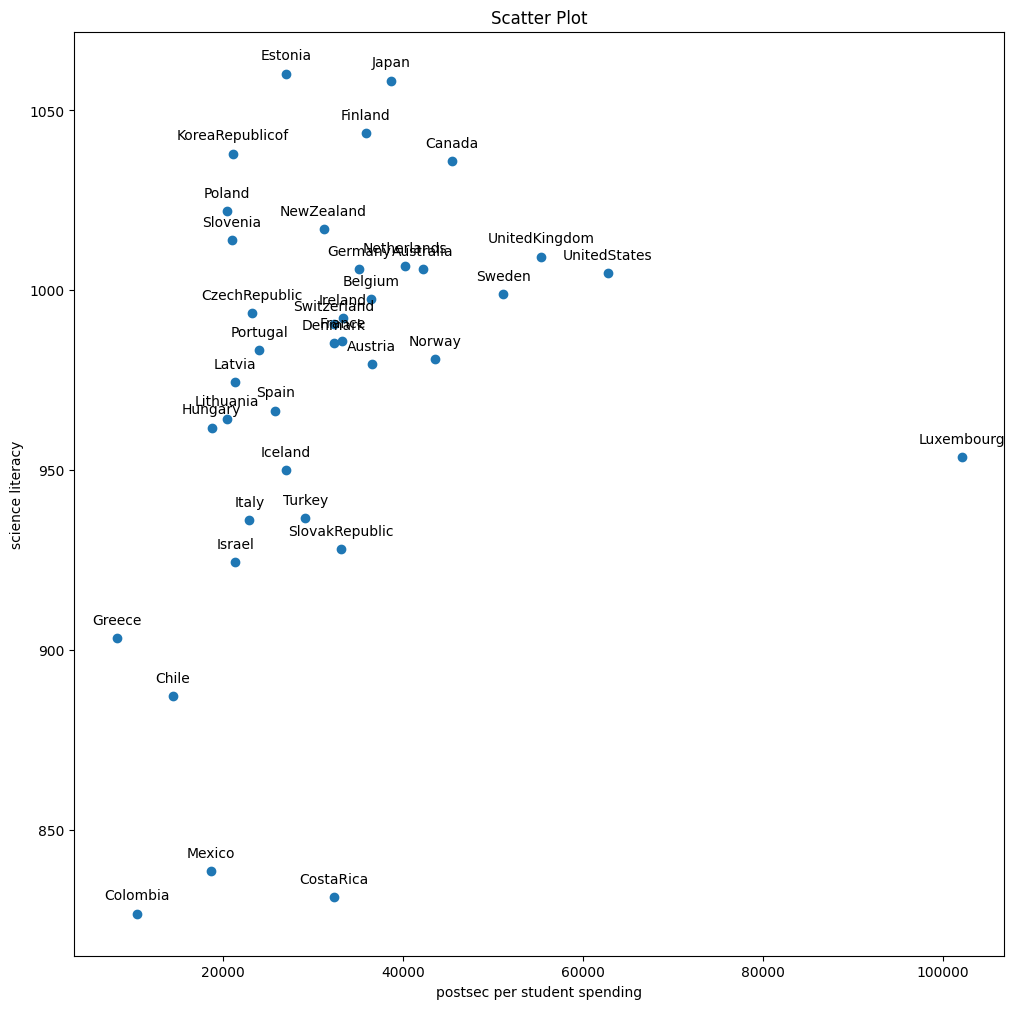

In [161]:
fig, ax = plt.subplots(figsize=(12, 12))


X_string = "postsec per student spending"
Y_strings = ["math literacy", "reading literacy", "science literacy"]
i=2

ax.scatter(df_means[X_string], df_means[Y_strings[i]])

for index, row in df_means.iterrows():
    ax.annotate(index, (row[X_string], row[Y_strings[i]]), textcoords="offset points", xytext=(0,10), ha='center')
    
    
ax.set_xlabel(X_string)
ax.set_ylabel(Y_strings[i])
ax.set_title('Scatter Plot')


#df_means.plot(x=X_string,y="math literacy",style="o")
#df_means.plot(x=X_string,y="reading literacy",style="o")
#df_means.plot(x=X_string,y="science literacy",style="o")

In [159]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_means.drop(["reading literacy", "math literacy", "science literacy"], axis=1)
Y = df_means[["reading literacy"]]

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y.values, dtype=torch.float)


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
class RegressionDataset(Dataset):
    def __init__(self, X_data, Y_data):
        self.X_data = X_data
        self.Y_data = Y_data

    def __getitem__(self, index):
        return self.X_data[index], self.Y_data[index]

    def __len__(self):
        return len(self.X_data)

train_dataset = RegressionDataset(X_train, Y_train)
test_dataset = RegressionDataset(X_test, Y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [31]:
class MultivariateLinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultivariateLinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

input_size = X.shape[1]
output_size = Y.shape[1]
model = MultivariateLinearRegression(input_size, output_size)


In [42]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [43]:
epochs = 1000
for epoch in range(epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')


Epoch: 10, Loss: 390425.1250
Epoch: 20, Loss: 387333.2812
Epoch: 30, Loss: 384267.3750
Epoch: 40, Loss: 381224.9062
Epoch: 50, Loss: 378204.2812
Epoch: 60, Loss: 375204.8750
Epoch: 70, Loss: 372226.2500
Epoch: 80, Loss: 369268.1250
Epoch: 90, Loss: 366330.1875
Epoch: 100, Loss: 363412.3125
Epoch: 110, Loss: 360514.1250
Epoch: 120, Loss: 357635.4688
Epoch: 130, Loss: 354776.1875
Epoch: 140, Loss: 351936.0625
Epoch: 150, Loss: 349114.9062
Epoch: 160, Loss: 346312.5625
Epoch: 170, Loss: 343528.8750
Epoch: 180, Loss: 340763.5938
Epoch: 190, Loss: 338016.6875
Epoch: 200, Loss: 335287.9062
Epoch: 210, Loss: 332577.1250
Epoch: 220, Loss: 329884.2188
Epoch: 230, Loss: 327209.0312
Epoch: 240, Loss: 324551.4375
Epoch: 250, Loss: 321911.2500
Epoch: 260, Loss: 319288.3750
Epoch: 270, Loss: 316682.6875
Epoch: 280, Loss: 314094.0938
Epoch: 290, Loss: 311522.4688
Epoch: 300, Loss: 308967.5938
Epoch: 310, Loss: 306429.4688
Epoch: 320, Loss: 303907.8750
Epoch: 330, Loss: 301402.7812
Epoch: 340, Loss: 2

In [44]:
model.eval()
with torch.no_grad():
    test_loss = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

test_loss = test_loss / len(test_loader)


In [45]:
print(test_loss)

5896027.5
